## Environment Setup

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert (0, './_functions_/')
from functions_eda import *

## Datasets

In [6]:
population = pd.read_csv('./raw_data/population_states.csv')
stations_state = pd.read_csv('./clean_data/stations_per_state.csv')
population.head()

,Land,Total,Area,Density
0,Baden-Württemberg,11280 257,"35747,85",316
1,Bayern,13369 393,"70541,58",190
2,Berlin,3755 251,"891,12",4214
3,Brandenburg,2573 135,"29654,38",87
4,Bremen,684864,"419,61",1632


In [9]:
population.rename(columns = {"Land":"State"}, inplace=True)
stations_state.rename (columns = {"state":"State", "number_of_stations": "Number of stations"}, inplace=True)

population = population.merge(stations_state, on = "State", how="left")

population.head(5)



,State,Total,Area,Density,Number of stations
0,Baden-Württemberg,11280 257,"35747,85",316,5678
1,Bayern,13369 393,"70541,58",190,6722
2,Berlin,3755 251,"891,12",4214,954
3,Brandenburg,2573 135,"29654,38",87,737
4,Bremen,684864,"419,61",1632,247


In [23]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               16 non-null     object
 1   Total               16 non-null     int64 
 2   Area                16 non-null     int64 
 3   Density             16 non-null     int64 
 4   Number of stations  16 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 772.0+ bytes


In [10]:
# Convert types of "Area" and "Total" to int
population["Area"] = population["Area"].str.replace(",", "").astype(int)
population["Total"] = population ["Area"].astype(int)

population.head(5)

,State,Total,Area,Density,Number of stations
0,Baden-Württemberg,3574785,3574785,316,5678
1,Bayern,7054158,7054158,190,6722
2,Berlin,89112,89112,4214,954
3,Brandenburg,2965438,2965438,87,737
4,Bremen,41961,41961,1632,247


In [12]:
population.columns

Index(['State', 'Total', 'Area', 'Density', 'Number of stations'], dtype='object')

In [ ]:
## Define a color palette for the german states

In [14]:
german_states_colors = {
    'Baden-Württemberg': '#ff7f0e',  # bright orange
    'Bayern': '#1f77b4',  # blue
    'Berlin': '#d62728',  # red
    'Brandenburg': '#2ca02c',  # green
    'Bremen': '#9467bd',  # purple
    'Hamburg': '#8c564b',  # brown
    'Hessen': '#e377c2',  # pink
    'Mecklenburg-Vorpommern': '#7f7f7f',  # gray
    'Niedersachsen': '#bcbd22',  # olive
    'Nordrhein-Westfalen': '#17becf',  # cyan
    'Rheinland-Pfalz': '#ffbb78',  # light orange
    'Saarland': '#98df8a',  # light green
    'Sachsen': '#ff9896',  # salmon
    'Sachsen-Anhalt': '#c5b0d5',  # lavender
    'Schleswig-Holstein': '#f7b6d2',  # light pink
    'Thüringen': '#c49c94'  # beige
}


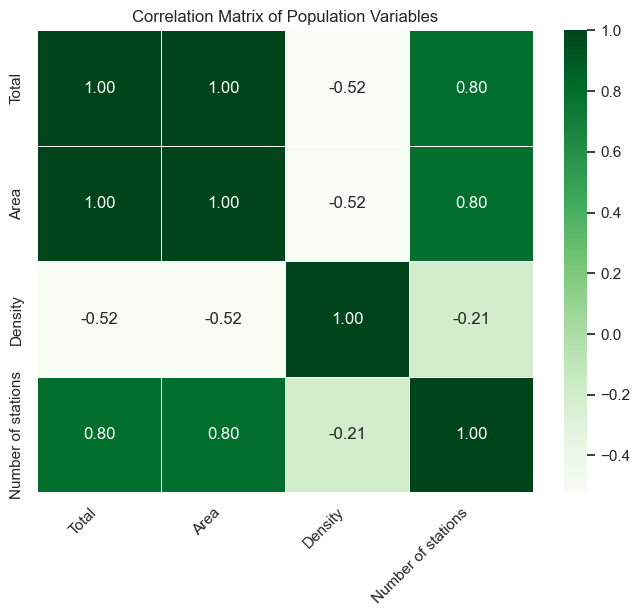

In [20]:
numbers = ['Total', 'Area', 'Density', 'Number of stations']
correlation_matrix = population[numbers].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix of Population Variables")
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.show()

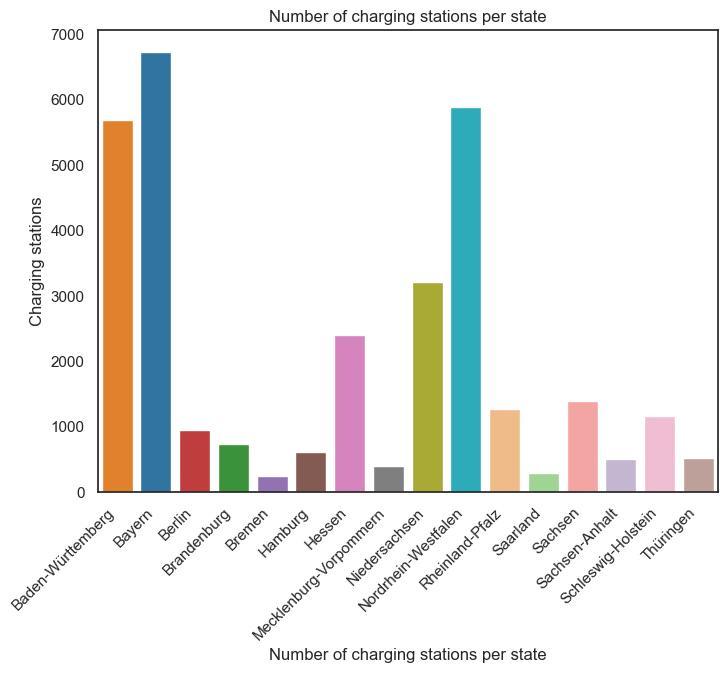

In [26]:

plt.figure(figsize=(8, 6))
sns.barplot(x = "State", y = "Number of stations", data= population, palette = german_states_colors)
plt.ylabel ("Charging stations");
plt.xlabel("Number of charging stations per state")
plt.title("Number of charging stations per state")
# rotate the names of the states, to not polut the chart
plt.xticks(rotation=45, ha="right")

plt.show()